# Hero Analysis:
### -Analytics Programming Project 1 & 3

- Author: Ruoyu Chen

- Github Repository: https://github.com/jc000222/Hero_analysis

## Table of Contents

- [1 Introduction](#1-introduction)
- [2 Data Summary](#2-data-summary)
- [3 Exploratory data analysis](#3-exploratory-data-analysis)
    - [3.1 comic book superheroes](###21-dataset-1-comic-book-superheroes)
        - [3.1.1 Sub-subsection One](######311-univariate-analysis)
            - [page_id](#page_id)
            - [name](#name)
            - [urlslug](#urlslug)
            - [ID](#id)
            - [ALIGN](#align)
            - [EYE](#eye)
            - [HAIR](#hair)
            - [SEX](#sex)
            - [GSM](#gsm)
            - [ALIVE](#alive)
            - [APPEARANCES](#appearances)
            - [FIRST APPEARANCE](#first-appearance)
            - [YEAR](#year)
            - [Comic](#comic)
    - [3.2 Movie Superheroes](#32-dataset-2-movie-superheroes)
    - [3.3 data-cleaning](#33-data-cleaning)
- [4 Inference](#4-inference)
- [5 Conclusion](#5conclusion)
- [Reference](#reference)


# 1. Introduction
This analysis project focuses on exploring Marvel and DC superheroes using two datasets. The first dataset investigates hero popularity, longevity, and diversity aspects such as gender and sexual orientation. The second dataset dives into superhero movie industry by analyzing imdb and tamatoes ratings. By merging these datasets, the analysis aims to uncover the relationship between comic book heroes and movies those portrayed in.


Main Research questions:
1. Does gender have a relationship with the ID of the hero?
2. Does gender affect the appearances of heros?
2. Does GSM have a pattern on the scale of time?

# 2. Data summary

### 2.1 Dataset 1: comic book superheroes

##### 2.1.1 Introduction
This dataset contains data behind the story "Comic Books Are Still Made By Men, For Men And About Men". The data comes from Marvel Wikia and DC Wikia. The data is split into two files, for DC and Marvel, respectively: dc-wikia-data.csv and marvel-wikia-data.csv. 

Link: https://github.com/fivethirtyeight/data/blob/master/comic-characters/README.md

##### 2.1.2 Data Variables:
| Variable          | Description                                                                                  |
|-------------------|----------------------------------------------------------------------------------------------|
| page_id           | The unique identifier for that character's page within the wikia                             |
| name              | The name of the character                                                                    |
| urlslug           | The unique URL within the wikia that takes you to the character                              |
| ID                | The identity status of the character (Secret Identity, Public identity, No Dual Identity)    |
| ALIGN             | If the character is Good, Bad, or Neutral                                                    |
| EYE               | Eye color of the character                                                                   |
| HAIR              | Hair color of the character                                                                  |
| SEX               | Sex of the character (e.g., Male, Female, etc.)                                              |
| GSM               | If the character is a gender or sexual minority (e.g., Homosexual characters, bisexual...)   |
| ALIVE             | If the character is alive or deceased                                                        |
| APPEARANCES       | The number of appearances of the character in comic books                                    |
| FIRST APPEARANCE  | The month and year of the character's first appearance in a comic book                       |
| YEAR              | The year of the character's first appearance in a comic book                                 |



##### 2.1.3 Data Combine
The dataset has two csv files. For better analysis, read the csv and combine them into single dataframe and add a "Comic" column to indicate whether the hero is from Marvel or DC.

In [75]:
from src.hero_data.Data_Sum.data_sum import Reader
data_url= ['https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/dc-wikia-data.csv',
           'https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/marvel-wikia-data.csv']

reader_comic = Reader(data_url)
df_comic_raw = reader_comic.combiner()

##### 2.1.4 Data Overview
Check the first 5 rows of the dataset

In [76]:

df_comic_raw.head()


,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,Comic
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0,DC
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0,DC
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0,DC
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0,DC
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0,DC


##### 2.1.5 Use Case: 
This dataset contains data behind the story 'Comic Books Are Still Made By Men, For Men And About Men'. This article from highlights the underrepresentation of women in the comic book industry, both as creators and characters. It discusses efforts by major comic publishers to diversify their offerings but notes that there is still a significant gender disparity in the field. 
- Use case attribures:   
The use case has attributes of gender, year of appearance, sex and GSM.
- Use case attribures data type:  
Gender, sex and GSM are catagorical data. Year of appearance is numeric.
- Use case link: https://fivethirtyeight.com/features/women-in-comic-books/

##### 2.2.1 Introduction
This dataset contains the movies of Marvel and DC.

Link: https://drive.google.com/file/d/1wJvsXEctDJScS6dv9IvJy65Qr5LwQL8P/view

##### 2.2.2 Data Variables:
| Variable          | Description                                                                                  |
|-------------------|----------------------------------------------------------------------------------------------|
| title             | Title of the movie                                                                           |
| year              | Year the movie was released                                                                  |
| genre             | Genre of the movie                                                                           |
| runtime           | Duration of the movie in minutes                                                             |
| mpa_rating        | MPAA rating (e.g., PG-13, R, etc.)                                                           |
| imdb_rating       | IMDb rating of the movie                                                                     |
| imdb_votes        | Number of votes the movie received on IMDb                                                   |
| imdb_gross        | Gross earnings of the movie according to IMDb                                                |
| director          | Director(s) of the movie                                                                     |
| stars             | Main actors or stars in the movie                                                            |
| description       | Brief description or summary of the movie                                                    |
| crit_consensus    | Critical consensus or summary of critical reviews about the movie                            |
| tomato_meter      | Rotten Tomatoes meter score                                                                  |
| tomato_review     | Number of reviews on Rotten Tomatoes                                                         |
| tom_aud_score     | Rotten Tomatoes audience score                                                               |
| tom_ratings       | Total number of ratings on Rotten Tomatoes                                                   |
| entity            | Whether it is a Marvel movie or DC movie                                                     |
| id                | Unique identifier or ID for the movie                                                        |

##### 2.2.3 Data Overview
Check the first 5 rows of the dataset

In [77]:
data= 'src/hero_data/data/marvelvsdc.csv'

reader_movie = Reader(data)
df_movie_raw = reader_movie.reader()
df_movie_raw.head()

,Unnamed: 0,title,year,genre,runtime,mpa_rating,imdb_rating,imdb_votes,imdb_gross,director,stars,description,crit_consensus,tomato_meter,tomato_review,tom_aud_score,tom_ratings,entity,id
0,38,Ant-Man,2015,"Action, Adventure, Comedy",117,PG-13,7.3,590834.0,180200000.0,Peyton Reed,"Peyton Reed,Paul Rudd,Michael Douglas,Corey St...",Armed with a super-suit with the astonishing a...,"Led by a charming performance from Paul Rudd, ...",83,334,86,100000,MARVEL,38
1,51,Ant-Man and the Wasp,2018,"Action, Adventure, Comedy",118,PG-13,7.0,329600.0,216650000.0,Peyton Reed,"Peyton Reed,Paul Rudd,Evangeline Lilly,Michael...",As Scott Lang balances being both a superhero ...,"A lighter, brighter superhero movie powered by...",87,435,75,25000,MARVEL,51
2,86,Aquaman,2018,"Action, Adventure, Fantasy",143,PG-13,6.9,400424.0,335060000.0,James Wan,"Jason Momoa,Amber Heard,Willem Dafoe,Patrick W...","Arthur Curry, the human-born heir to the under...",Aquaman swims with its entertainingly ludicrou...,65,406,74,25000,DC,86
3,37,Avengers: Age of Ultron,2015,"Action, Adventure, Sci-Fi",141,PG-13,7.3,772476.0,459010000.0,Joss Whedon,"Joss Whedon,Robert Downey Jr.,Chris Evans,Mark...",When Tony Stark and Bruce Banner try to jump-s...,"Exuberant and eye-popping, Avengers: Age of Ul...",76,372,83,250000,MARVEL,37
4,54,Avengers: Endgame,2019,"Action, Adventure, Drama",181,PG-13,8.4,890937.0,858370000.0,Anthony Russo,"Joe Russo,Robert Downey Jr.,Chris Evans,Mark R...",After the devastating events of Avengers: Infi...,"Exciting, entertaining, and emotionally impact...",94,541,90,50000,MARVEL,54


# 3 Exploratory data analysis
### 3.1 Dataset 1: comic book superheroes



In [78]:
from src.hero_data.EDA.per_colum import EDA_per_column

eda_comics = EDA_per_column(df_comic_raw)

##### 3.1.1 Univariate Analysis
In this part, the analysis will go through all the columns in the dataset to get a basic understanding.



##### - Page_id:   
Description:&nbsp;The unique identifier for that character's page within the wikia  
Explaination:The id has no meaning for analysis thus this column can be dropped.

##### - name:   
Description:&nbsp;The name of the character.  
Explaination:There are 23272 unique superhero names.

In [79]:
df_comic_raw['name'].describe()

count                    23272
unique                   23272
top       Batman (Bruce Wayne)
freq                         1
Name: name, dtype: object

##### - urlslug:   
Description:&nbsp;The unique URL within the wikia that takes you to the character.  
Explaination:The URL of Wekia has no meaning for analysis thus this column can be dropped.

##### - ID:   
Description:&nbsp;The identity status of the character (Secret Identity, Public identity, No Dual Identity).  
This is a categorical variable, use value_counts() to see the value under each category. As shown, there are 5 category for the identity status.  

In [80]:
df_comic_raw['ID'].value_counts()

ID
Secret Identity                  8683
Public Identity                  6994
No Dual Identity                 1788
Known to Authorities Identity      15
Identity Unknown                    9
Name: count, dtype: int64

The code below shows the percentage of each category. The mojority of heroes are Secret Identity, with almost 50% of all heroes; followed by Public Identity up to 40%. While minority are No Dual Identity, Known to Authorities Identity or Identity Unknown.

In [81]:
eda_comics.cat_percentage('ID')

ID
Secret Identity                  49.65
Public Identity                  39.99
No Dual Identity                 10.22
Known to Authorities Identity     0.09
Identity Unknown                  0.05
Name: count, dtype: float64

Plot these results and visuallize the data with barplot through Matplotlib and Seaborn.

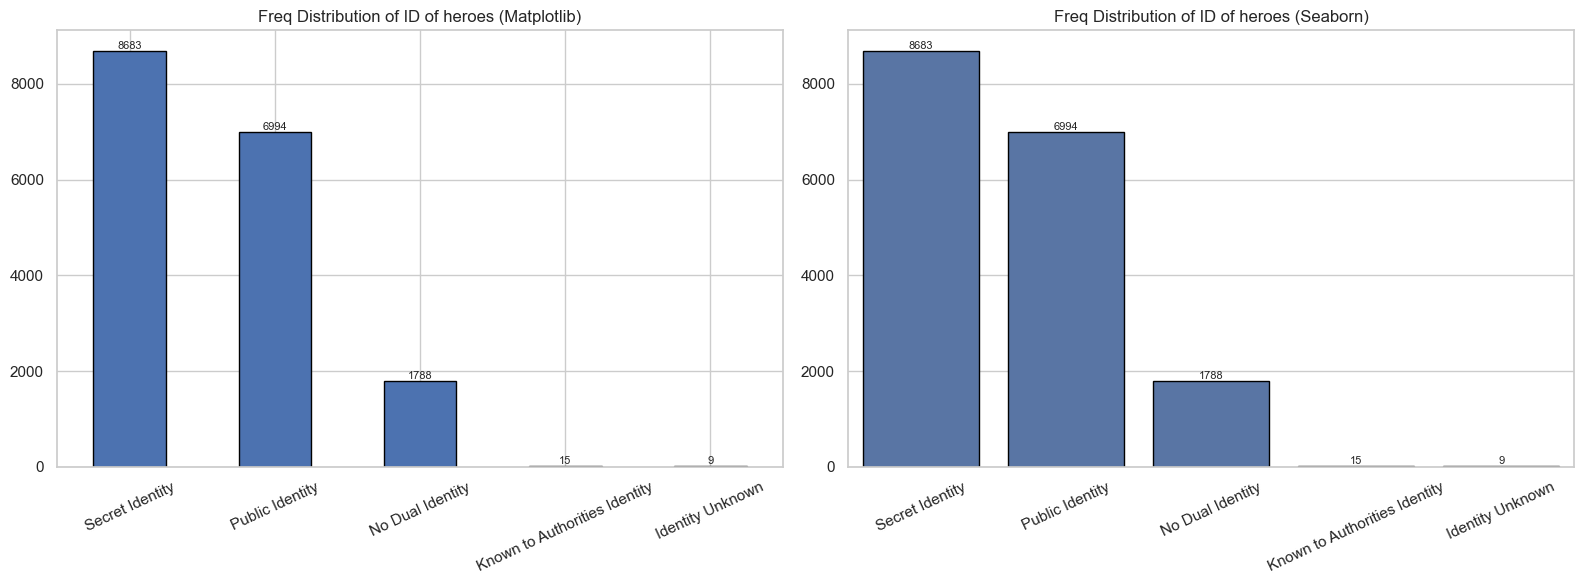

In [82]:
eda_comics.bar_chart('ID')

It seems that there are less row of data than expected. Check the number of NULL data by isna(). It indicates that there are 5783 rows of null data. 

In [83]:
df_comic_raw['ID'].isna().value_counts()

ID
False    17489
True      5783
Name: count, dtype: int64

##### - ALIGN:   
Description:&nbsp;If the character is Good, Bad, or Neutral.  
This is a categorical variable, use value_counts() to see the value under each category. As shown, there are 4 category for the align status.  

In [84]:
df_comic_raw['ALIGN'].value_counts()

ALIGN
Bad Characters        9615
Good Characters       7468
Neutral Characters    2773
Reformed Criminals       3
Name: count, dtype: int64

The code below shows the percentage of each category. The mojority of heroes are Bad Characters, for almost 50% of the heroes. Followed by 37% of Good Characters, while minority are Neutral Characters or Reformed Criminals.

In [85]:
eda_comics.cat_percentage('ALIGN')

ALIGN
Bad Characters        48.42
Good Characters       37.61
Neutral Characters    13.96
Reformed Criminals     0.02
Name: count, dtype: float64

Plot these results and visuallize the data with barplot through Matplotlib and Seaborn.

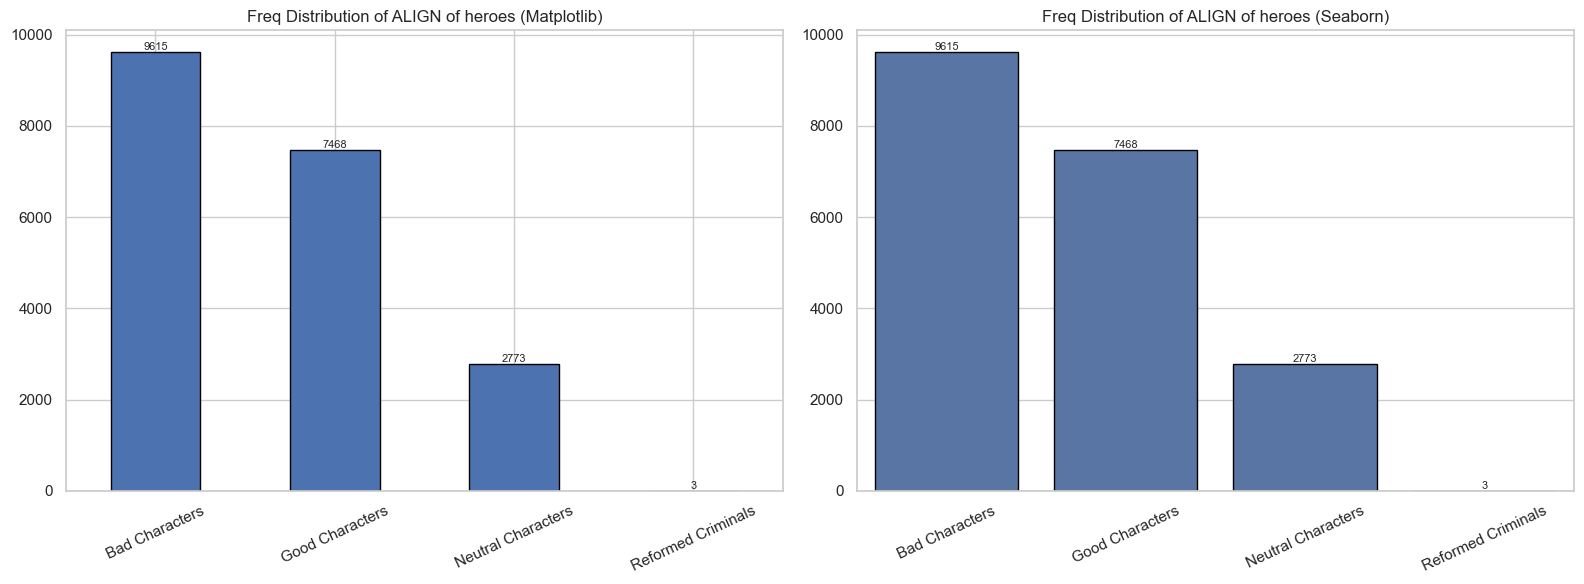

In [86]:
eda_comics.bar_chart('ALIGN')

It seems that there are less row of data than expected. Check the number of NULL data by isna(). It indicates that there are 3413 rows of null data. 

In [87]:
df_comic_raw['ALIGN'].isna().value_counts()

ALIGN
False    19859
True      3413
Name: count, dtype: int64

##### - EYE:   
Description:&nbsp;Eye color of the character.  
This is also a categorical variable, but with 26 different eye colors. See the category count by describe().  
The most eye color is blue, with 3064 heroes.

In [88]:
df_comic_raw['EYE'].describe()

count          9877
unique           26
top       Blue Eyes
freq           3064
Name: EYE, dtype: object

Plot these results and visuallize the data with barplot through Matplotlib and Seaborn.

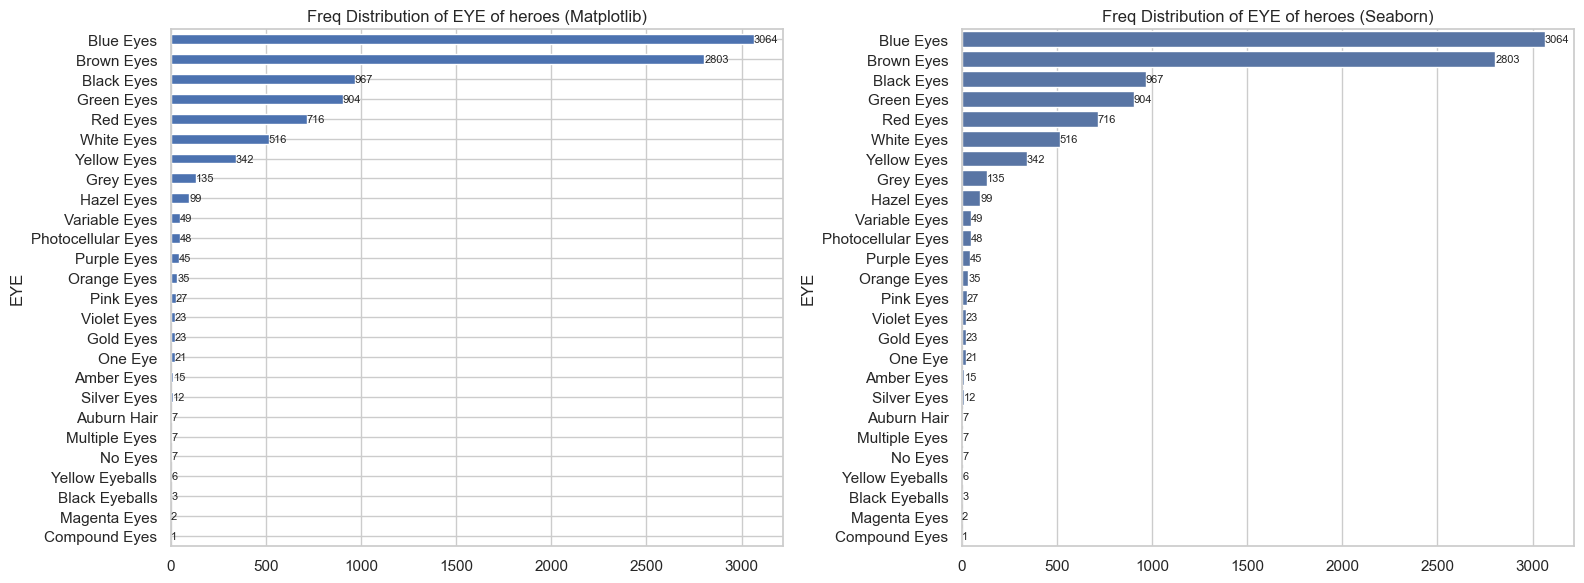

In [89]:
eda_comics.barh_chart('EYE')

It seems that there are less row of data than expected. Check the number of NULL data by isna(). It indicates that there are 9877 rows of null data. 

In [90]:
df_comic_raw['EYE'].isna().value_counts()

EYE
True     13395
False     9877
Name: count, dtype: int64

##### - HAIR:   
Description:&nbsp;Hair color of the character.  
This is also a categorical variable, but with 28 different hair colors. See the category count by describe().  
The most hair color is black hair, with 5329 heroes.

In [91]:
df_comic_raw['HAIR'].describe()

count          16734
unique            28
top       Black Hair
freq            5329
Name: HAIR, dtype: object

Plot these results and visuallize the data with barplot through Matplotlib and Seaborn.

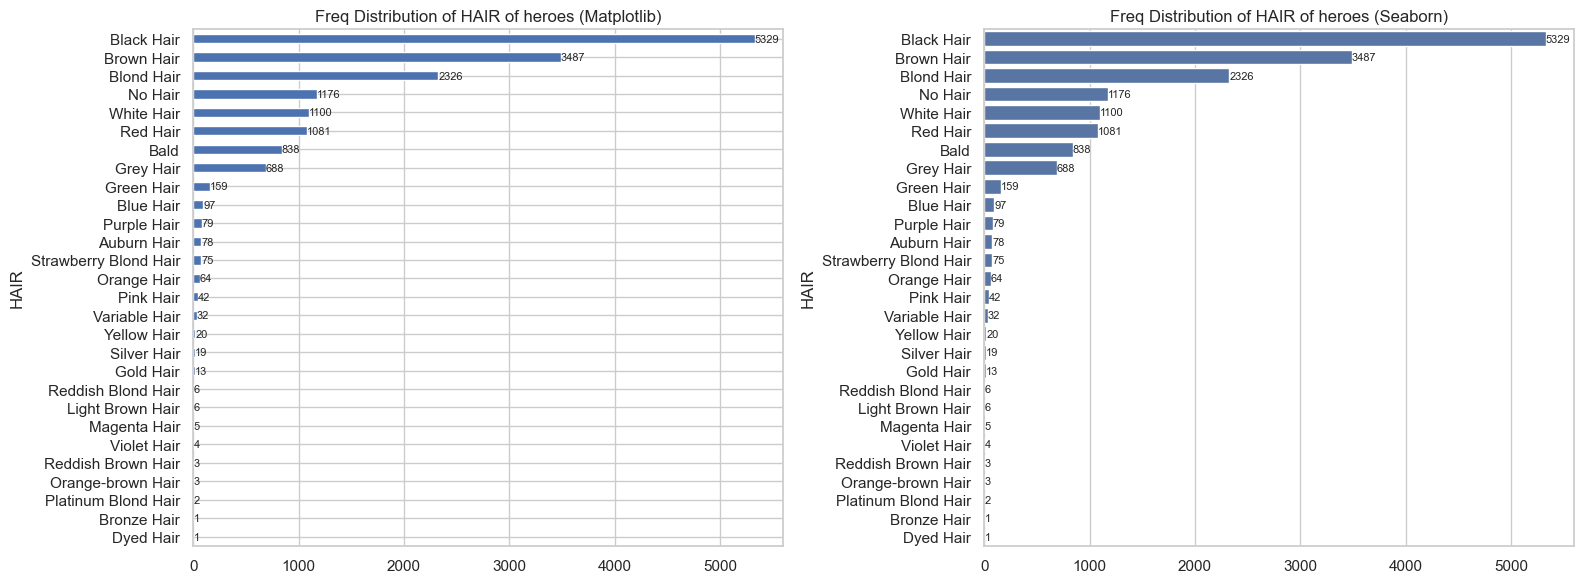

In [92]:
eda_comics.barh_chart('HAIR')

It seems that there are less row of data than expected. Check the number of NULL data by isna(). It indicates that there are 6538 rows of null data. 

In [93]:
df_comic_raw['HAIR'].isna().value_counts()

HAIR
False    16734
True      6538
Name: count, dtype: int64

##### - SEX:   
Description:&nbsp;Sex of the character (e.g., Male, Female, etc.)  
This is a categorical variable, use value_counts() to see the value under each category. As shown, there are 4 category for the align status.  

In [94]:
df_comic_raw['SEX'].value_counts()

SEX
Male Characters           16421
Female Characters          5804
Agender Characters           45
Genderless Characters        20
Genderfluid Characters        2
Transgender Characters        1
Name: count, dtype: int64

The code below shows the percentage of each category. The mojority of heroes are Male Characters, for 73% of the heroes, followed by 26% of Female Characters. While minority are Agender Characters, Genderfluid, Characters and Transgender Characters.

In [95]:
eda_comics.cat_percentage('SEX')

SEX
Male Characters           73.66
Female Characters         26.04
Agender Characters         0.20
Genderless Characters      0.09
Genderfluid Characters     0.01
Transgender Characters     0.00
Name: count, dtype: float64

Plot these results and visuallize the data with barplot through Matplotlib and Seaborn.

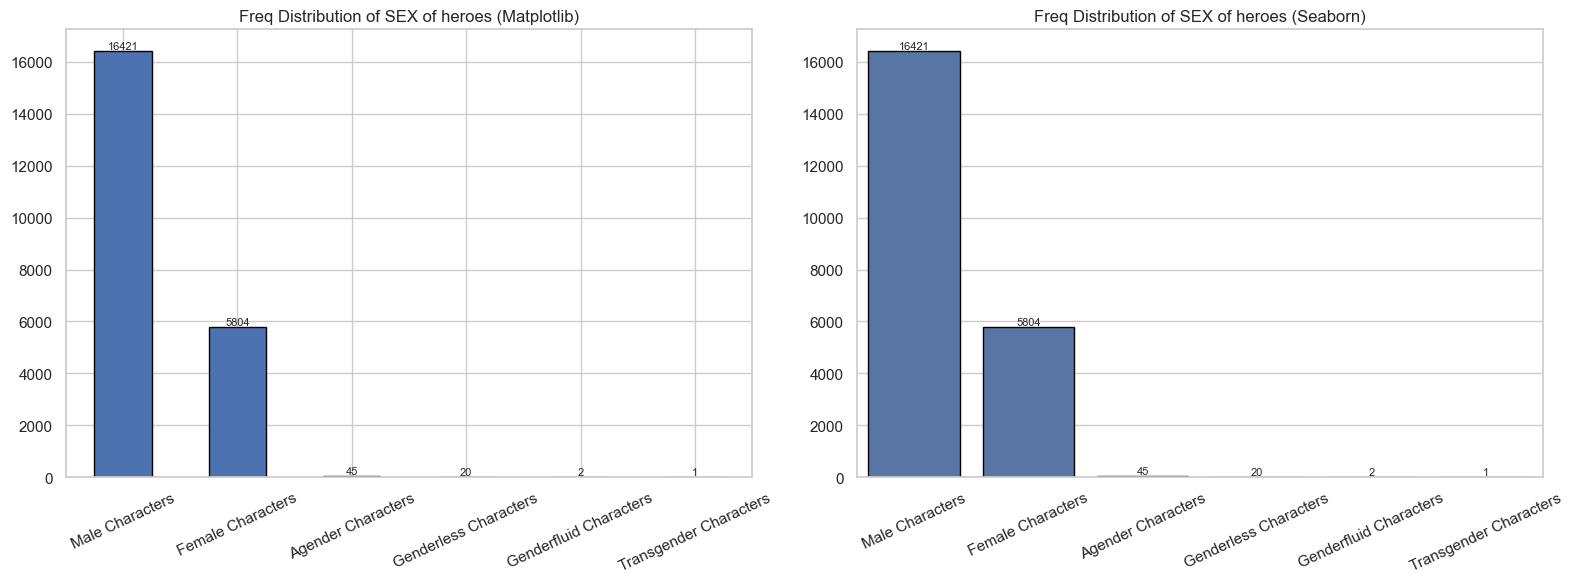

In [96]:
eda_comics.bar_chart('SEX')

It seems that there are less row of data than expected. Check the number of NULL data by isna(). It indicates that there are 979 rows of null data. 

In [97]:
df_comic_raw['SEX'].isna().value_counts()

SEX
False    22293
True       979
Name: count, dtype: int64

##### - GSM:   
Description:&nbsp; If the character is a gender or sexual minority (e.g., Homosexual characters, bisexual...)  
This is a categorical variable, use value_counts() to see the value under each category. As shown, there are 6 category for the GSM. Very little heroes have data on this column, and the most is Homosexual Characters.

In [98]:
df_comic_raw['GSM'].value_counts()

GSM
Homosexual Characters     120
Bisexual Characters        29
Transgender Characters      2
Transvestites               1
Pansexual Characters        1
Genderfluid Characters      1
Name: count, dtype: int64

Plot these results and visuallize the data with barplot through Matplotlib and Seaborn.

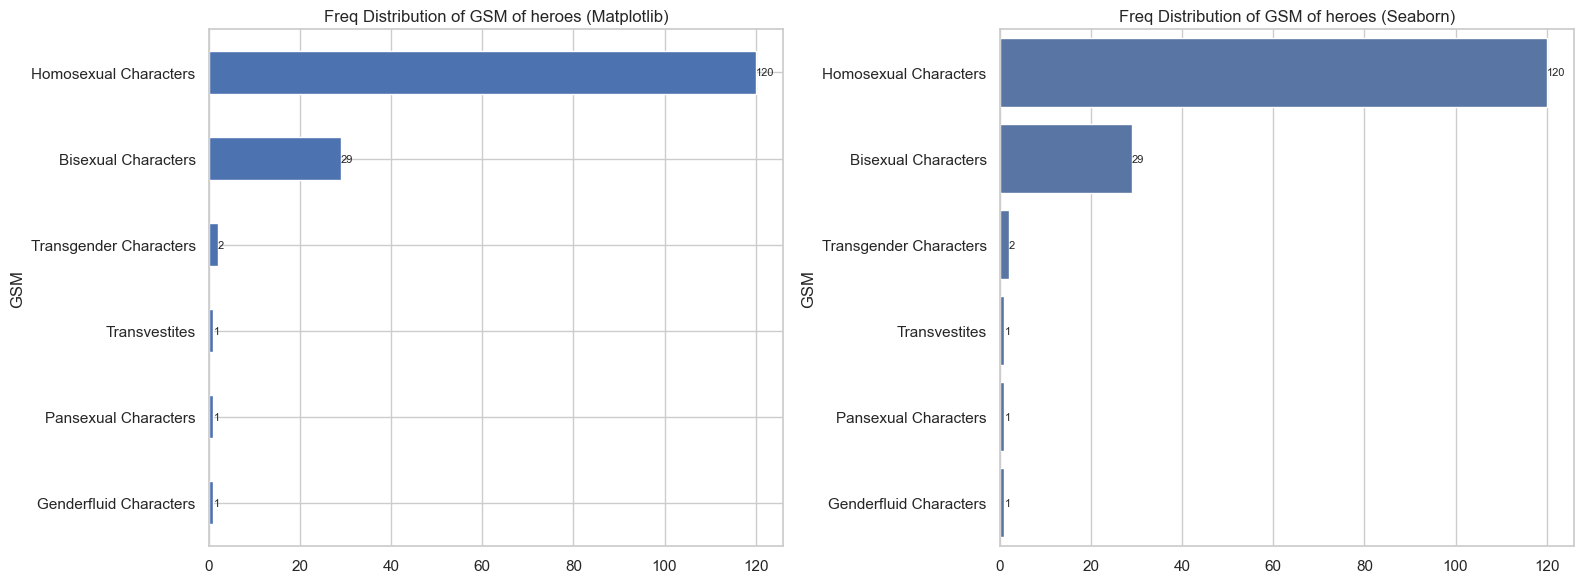

In [99]:
eda_comics.barh_chart('GSM')

##### - ALIVE:   
Description:&nbsp; If the character is alive or deceased  
This is a categorical variable, use value_counts() to see the value under each category. As shown, there are 2 category for the ALIVE status. 

In [100]:
df_comic_raw['ALIVE'].value_counts()

ALIVE
Living Characters      17808
Deceased Characters     5458
Name: count, dtype: int64

The code below shows the percentage of the two category. The mojority of heroes are Living Characters, for 76% of the heroes, the remaining are Deceased Characters.

In [101]:
eda_comics.cat_percentage('ALIVE')

ALIVE
Living Characters      76.54
Deceased Characters    23.46
Name: count, dtype: float64

Plot these results and visuallize the data with barplot through Matplotlib and Seaborn.

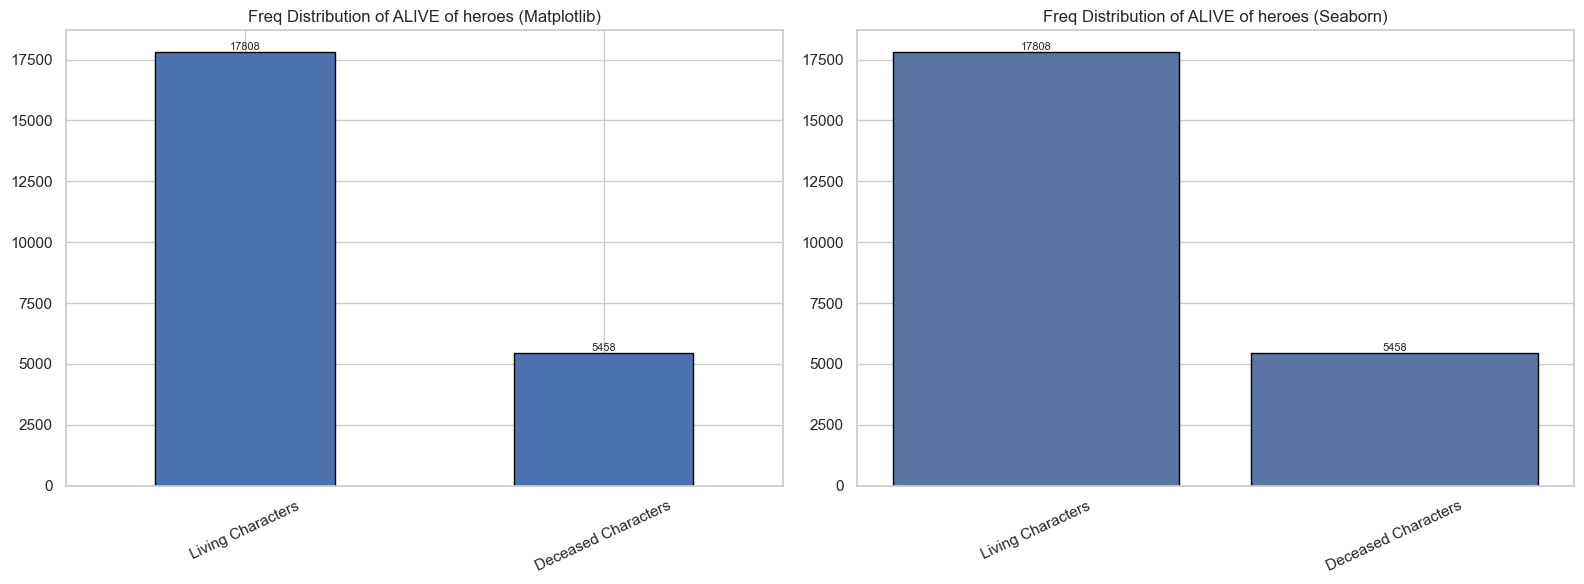

In [102]:
eda_comics.bar_chart('ALIVE')

##### - APPEARANCES:   
Description:&nbsp; The number of appearances of the character in comic books  
This is a numerical variable, use describe() to get an overview of the column. As shown, there are 2 category for the ALIVE status.  
The average count in these records is around 19, with a notable variability indicated by the standard deviation of 93.81. The range of APPEARANCES spans from a minimum of 1 to a maximum of 4043, suggesting a wide diversity; The distribution indicates that most values (75%) fall within 1-10, meaning most APPEARANCES is at a small number.

In [103]:
df_comic_raw['APPEARANCES'].describe()

count    21821.000000
mean        19.009303
std         93.814040
min          1.000000
25%          1.000000
50%          4.000000
75%         10.000000
max       4043.000000
Name: APPEARANCES, dtype: float64

Plot these results and visuallize the data with histogram through Matplotlib and Seaborn.

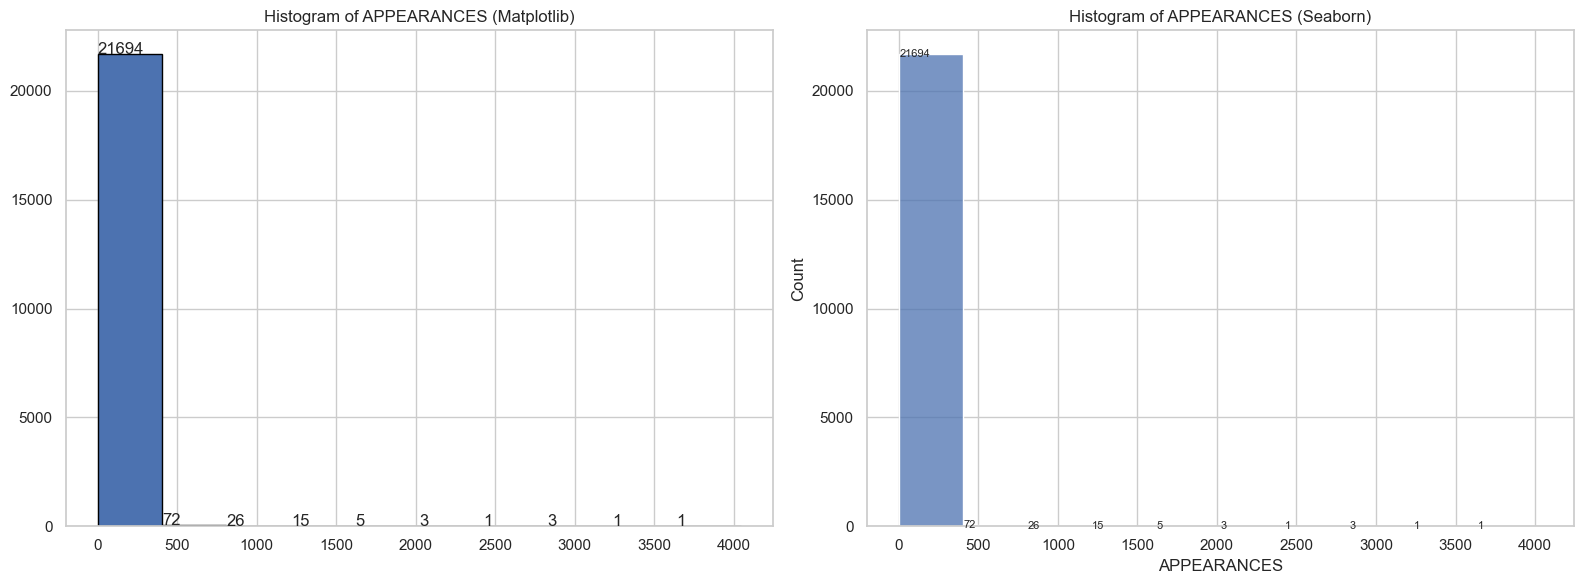

In [104]:
eda_comics.hist_chart('APPEARANCES')

##### - FIRST APPEARANCE:   
Description:&nbsp; The month and year of the character's first appearance in a comic book.  
This data is exactly the same as next column. Month is not meaningful to this analysis, so it can be dropped.

In [105]:
df_comic_raw['FIRST APPEARANCE'].head()

0         1939, May
1     1986, October
2     1959, October
3    1987, February
4       1940, April
Name: FIRST APPEARANCE, dtype: object

##### - YEAR:   
Description:&nbsp; The month and year of the character's first appearance in a comic book.  
The year varies from 1935 to 2013. And from the value_counts() we get the number of heroes that are introduced in that year.

In [106]:
df_comic_raw['YEAR'].value_counts().sort_index()

YEAR
1935.0      1
1936.0      9
1937.0      4
1938.0     10
1939.0     87
         ... 
2009.0    528
2010.0    603
2011.0    504
2012.0    206
2013.0    168
Name: count, Length: 79, dtype: int64

Plot these results and visuallize the data with line chart through Matplotlib and Seaborn.

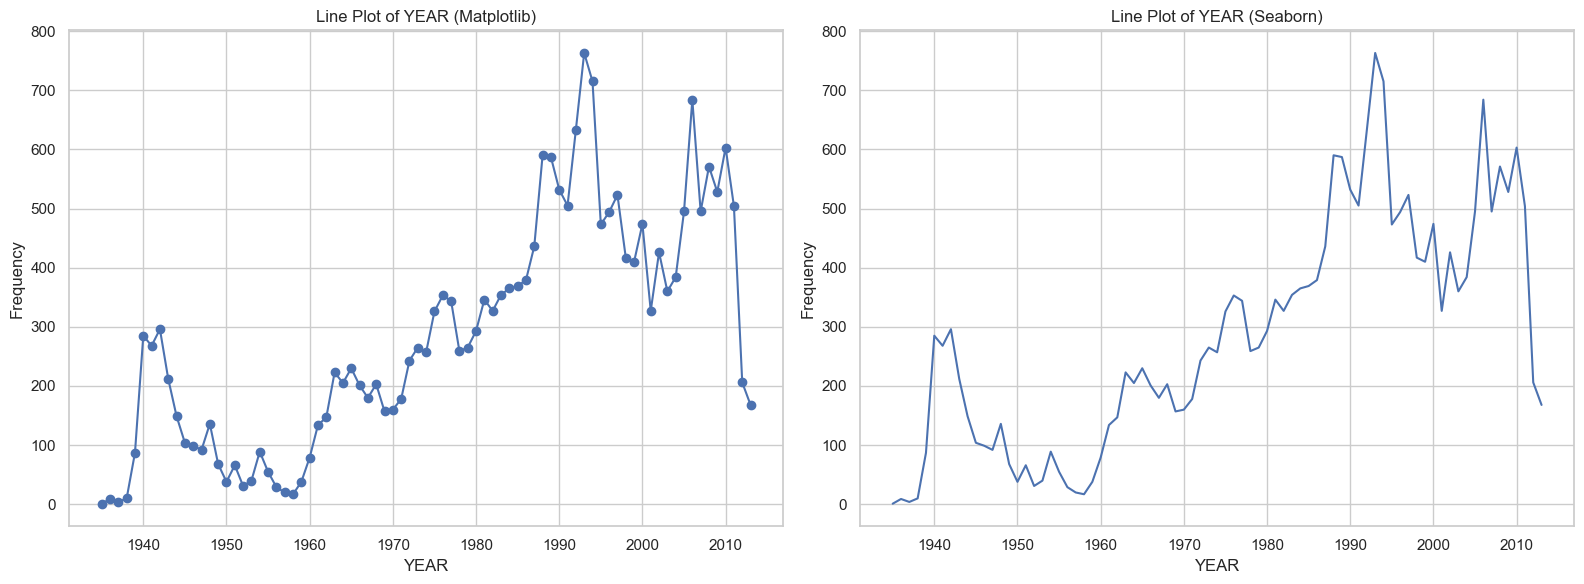

In [107]:
eda_comics.line_chart('YEAR')

- Comic:   
Description:&nbsp; If the character is from Marvel or DC.  
This is a categorical variable, use value_counts() to see the value under each category. As shown, there are 2 category for the ALIVE status. 

In [108]:
df_comic_raw['Comic'].value_counts()

Comic
MARVEL    16376
DC         6896
Name: count, dtype: int64

The code below shows the percentage of two category. The mojority of heroes are Marvel Characters, for almost 70% of the heroes. Followed by almost 30% of DC Characters.

In [109]:
eda_comics.cat_percentage('Comic')

Comic
MARVEL    70.37
DC        29.63
Name: count, dtype: float64

Plot these results and visuallize the data with barplot through Matplotlib and Seaborn.

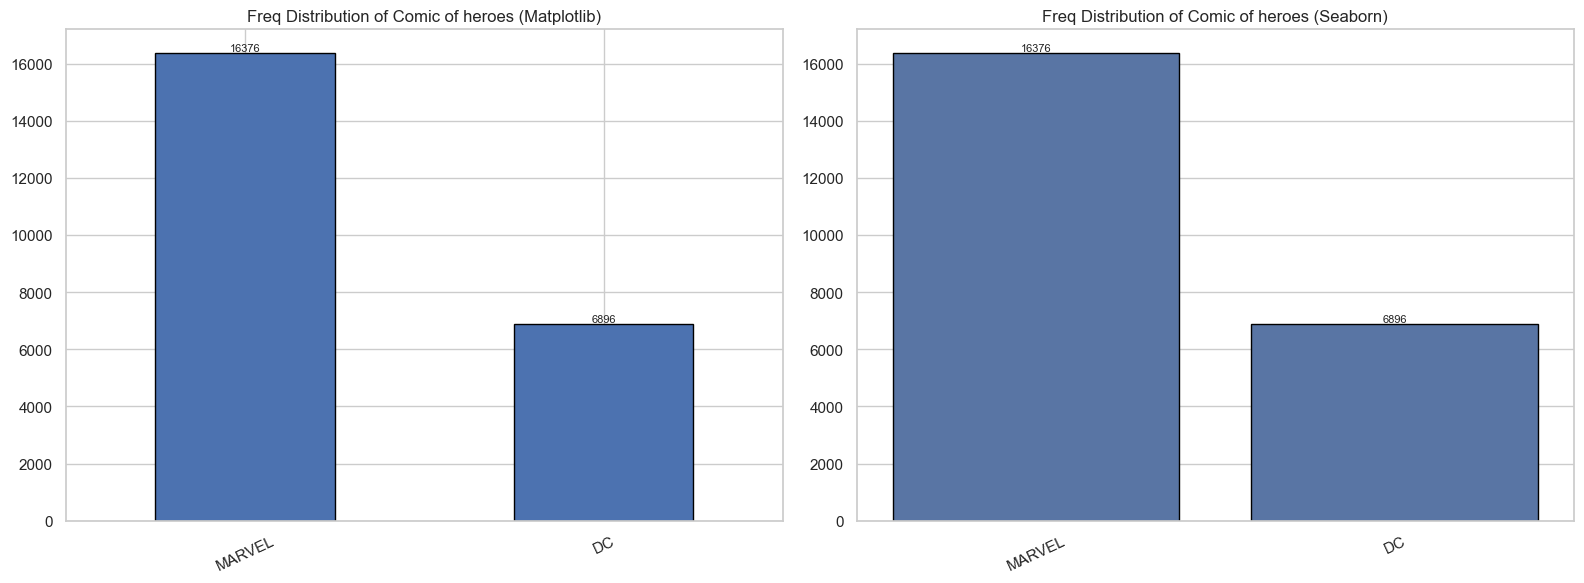

In [110]:
eda_comics.bar_chart('Comic')

##### 3.1.2 Bivariate Analysis
In this part, the analysis will go through some columns in the dataset to get a basic understanding.


In [111]:
from src.hero_data.EDA.multi_coumun import EDA_multi_column

eda_comics_m = EDA_multi_column(df_comic_raw)

##### -ALIGN & ID
The Bivariate Analysis for character ALIGN and identity shows us that a vast majority of the bad characters tend to have secret identity. The proportion of Secret and Public identity are less drastic for good characters.

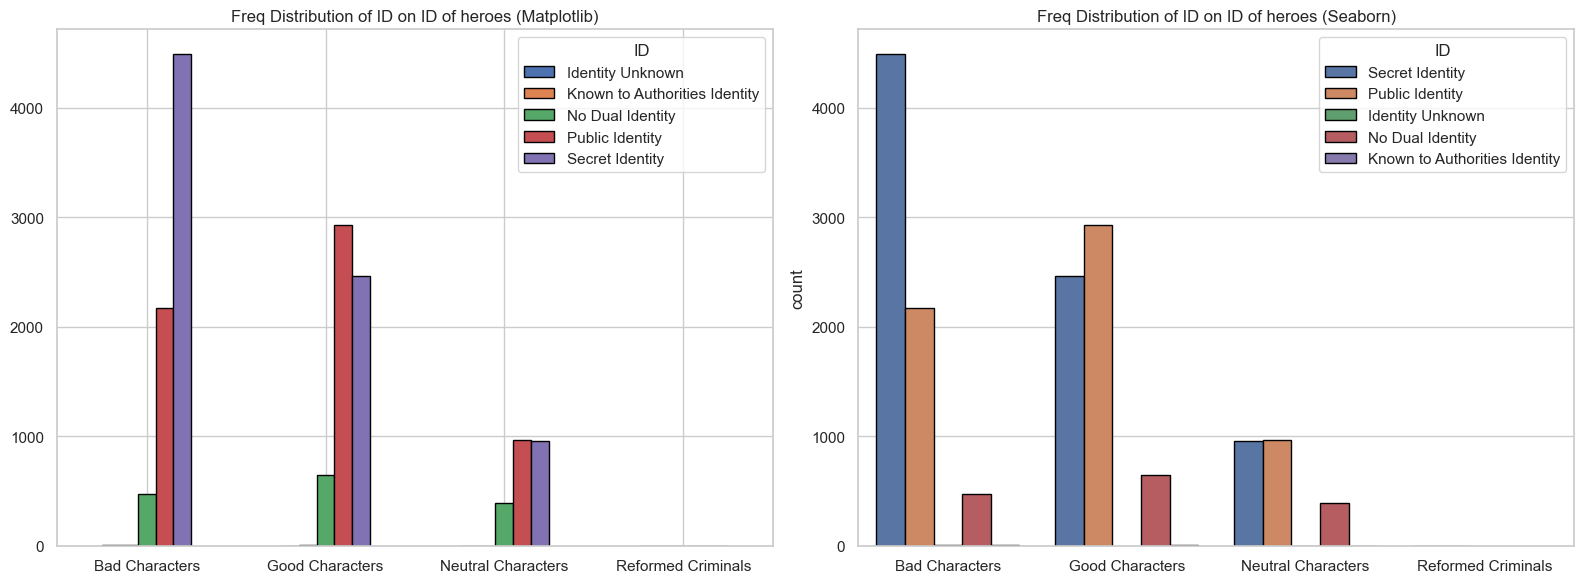

In [112]:
eda_comics_m.bar_chart_m(['ALIGN','ID'])

##### -ALIVE& ALIGN 
The Bivariate Analysis for character ALIGN and whether alive shows us that a vast majority characters are alive. And Bad characters tend to have more deceased. 

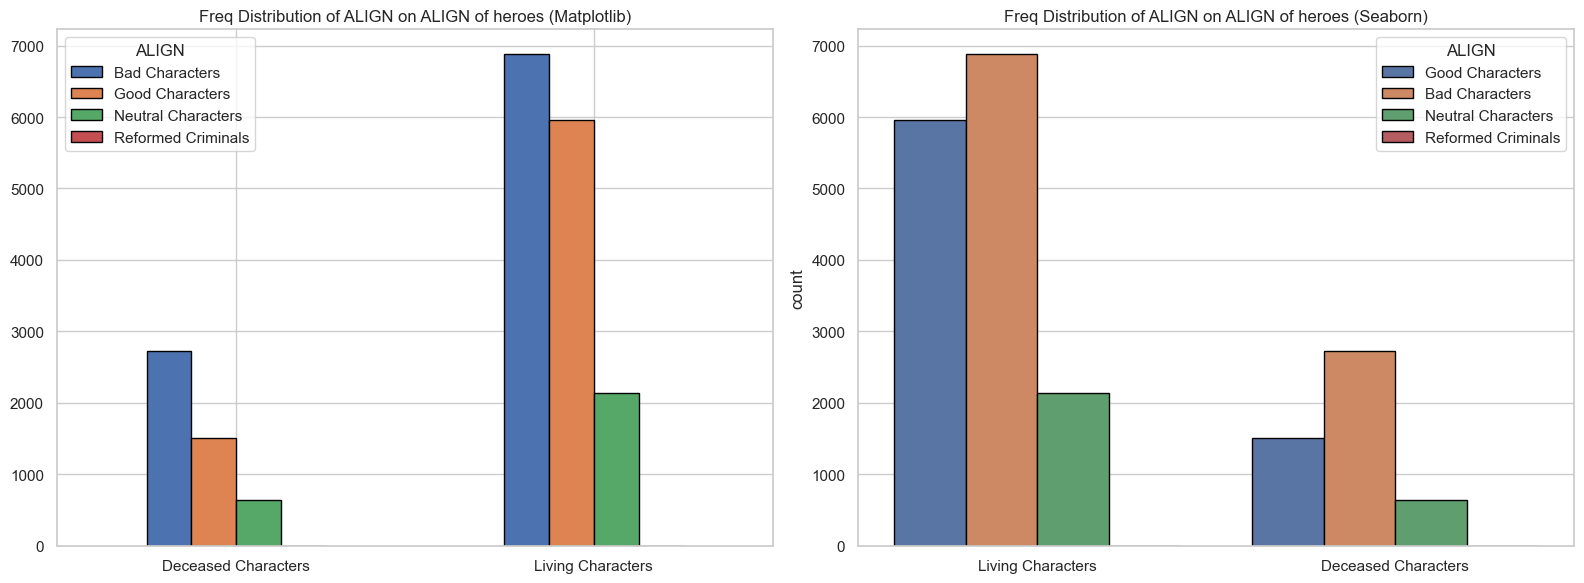

In [113]:
eda_comics_m.bar_chart_m(['ALIVE','ALIGN'])

### 3.2 Dataset 2: movie superheroes


##### 3.2.1 Univariate Analysis
In this part, the analysis will go through all the columns in the dataset to get a basic understanding.

In [114]:
eda_movies = EDA_per_column(df_movie_raw)

##### - title
Description: Title of the movie.  
There are 89 different superhero movies. The strange thing is that there are 2 movies that has same name.

In [115]:
df_movie_raw['title'].describe()

count                 90
unique                89
top       Fantastic Four
freq                   2
Name: title, dtype: object

##### - year
Description: Year the movie was released  
The year varies from 1944 to 2020. And from the value_counts() we get the number of movies that are screened in that year.

In [116]:
display(df_movie_raw['year'].value_counts().sort_index().head(5))
display(df_movie_raw['year'].value_counts().sort_index().tail(5))

year
1944    1
1951    1
1966    1
1978    1
1980    1
Name: count, dtype: int64

year
2016    6
2017    6
2018    6
2019    6
2020    3
Name: count, dtype: int64

Plot these results and visuallize the data with line chart through Matplotlib and Seaborn.

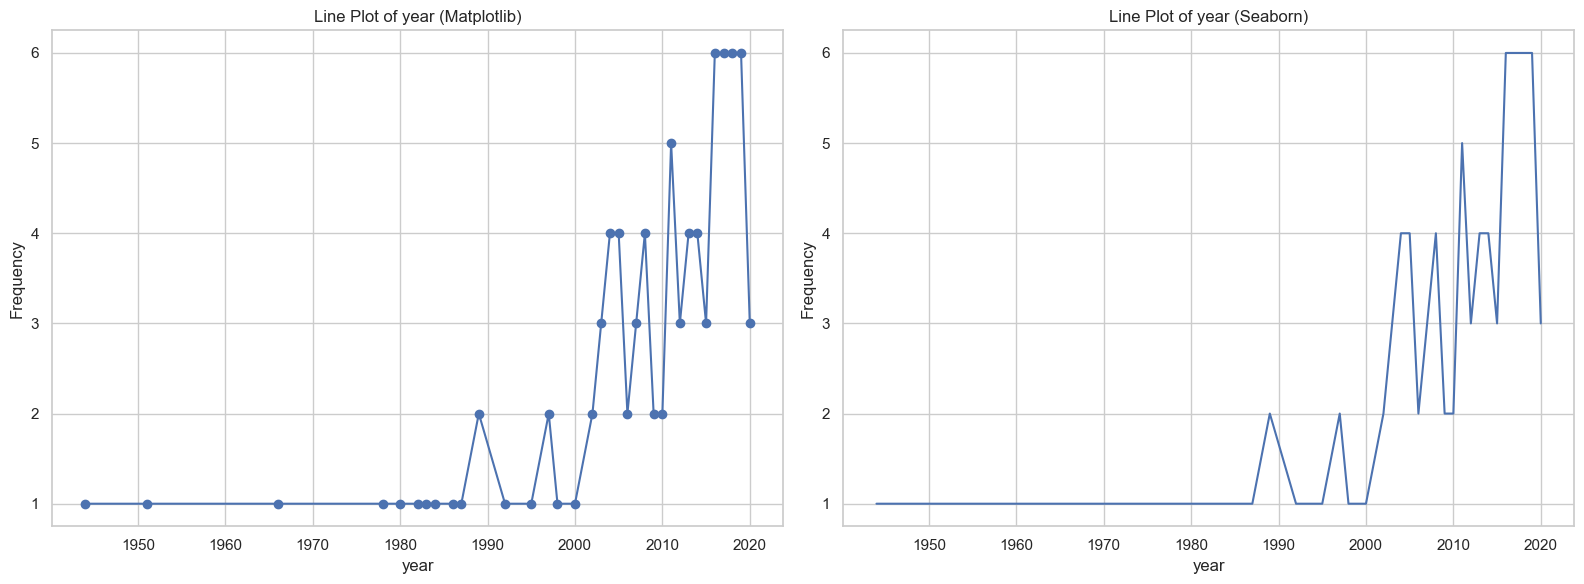

In [117]:
eda_movies.line_chart('year')

##### - genre:   
Description:&nbsp; Genre of the movie  
This is a categorical variable, use value_counts() to see the value under each category. As shown, there are many category for the genre. The data is aggregated and can be melt down to a better view.

In [118]:
df_movie_raw['genre'].value_counts()

genre
Action, Adventure, Sci-Fi     31
Action, Adventure, Fantasy    14
Action, Adventure, Comedy     12
Action, Sci-Fi                 5
Action, Adventure              4
Action, Adventure, Drama       3
Action, Crime, Drama           3
Action, Crime, Fantasy         2
Action, Fantasy, Horror        2
Action, Adventure, Crime       2
Action, Fantasy, Thriller      2
Action, Drama, Sci-Fi          1
Action, Drama, Mystery         1
Action, Horror, Mystery        1
Horror, Sci-Fi                 1
Action, Crime                  1
Action, Drama, Fantasy         1
Crime, Drama, Thriller         1
Action, Horror, Sci-Fi         1
Adventure, Comedy, Crime       1
Action, Sci-Fi, Thriller       1
Name: count, dtype: int64

##### - runtime:   
Description:&nbsp; Duration of the movie in minutes.  
This is a numerical variable, use describe() to see the value distribution. As shown, it contains 90 rows of data. The average runtime of the movies is approximately 124.14 minutes, with a standard deviation of 23.52 minutes. The shortest movie in the dataset runs for 58 minutes, while the longest runs for 244 minutes.

In [119]:
df_movie_raw['runtime'].describe()

count     90.000000
mean     124.144444
std       23.522192
min       58.000000
25%      110.500000
50%      124.000000
75%      136.000000
max      244.000000
Name: runtime, dtype: float64

Plot these results and visuallize the data with boxplot through Matplotlib and Seaborn.

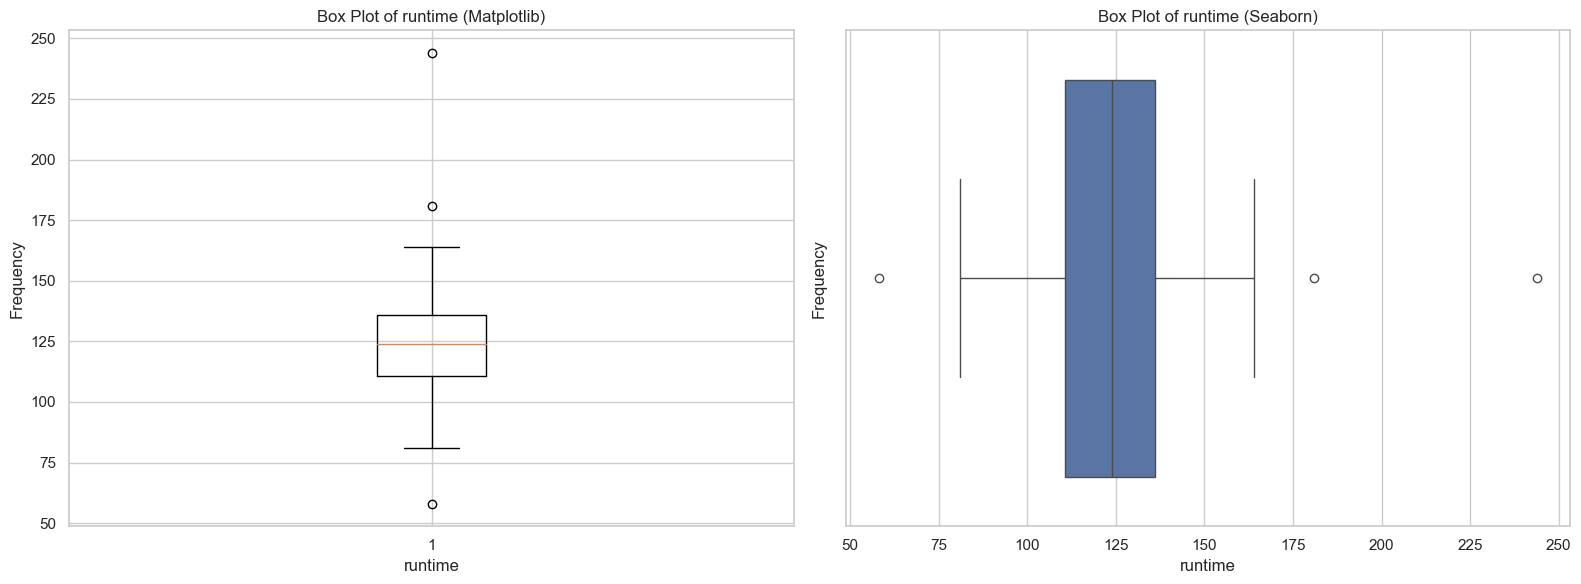

In [120]:
eda_movies.boxplot_chart('runtime')

##### - mpa_rating:   
Description:&nbsp; MPAA rating (e.g., PG-13, R, etc.)  
This is a categorical variable, use value_count() to see the value distribution. As shown, the most of movie ratings by MPAA is with a PG-13 rating, constituting 67 movies. Followed by R-rated movies, comprising 12 movies. While PG-rated films and those marked as 'Approved' or 'Passed' account for 9 and 1 each, respectively.

In [121]:
df_movie_raw['mpa_rating'].value_counts()

mpa_rating
PG-13       67
R           12
PG           9
Approved     1
Passed       1
Name: count, dtype: int64

Plot these results and visuallize the data with barplot through Matplotlib and Seaborn.

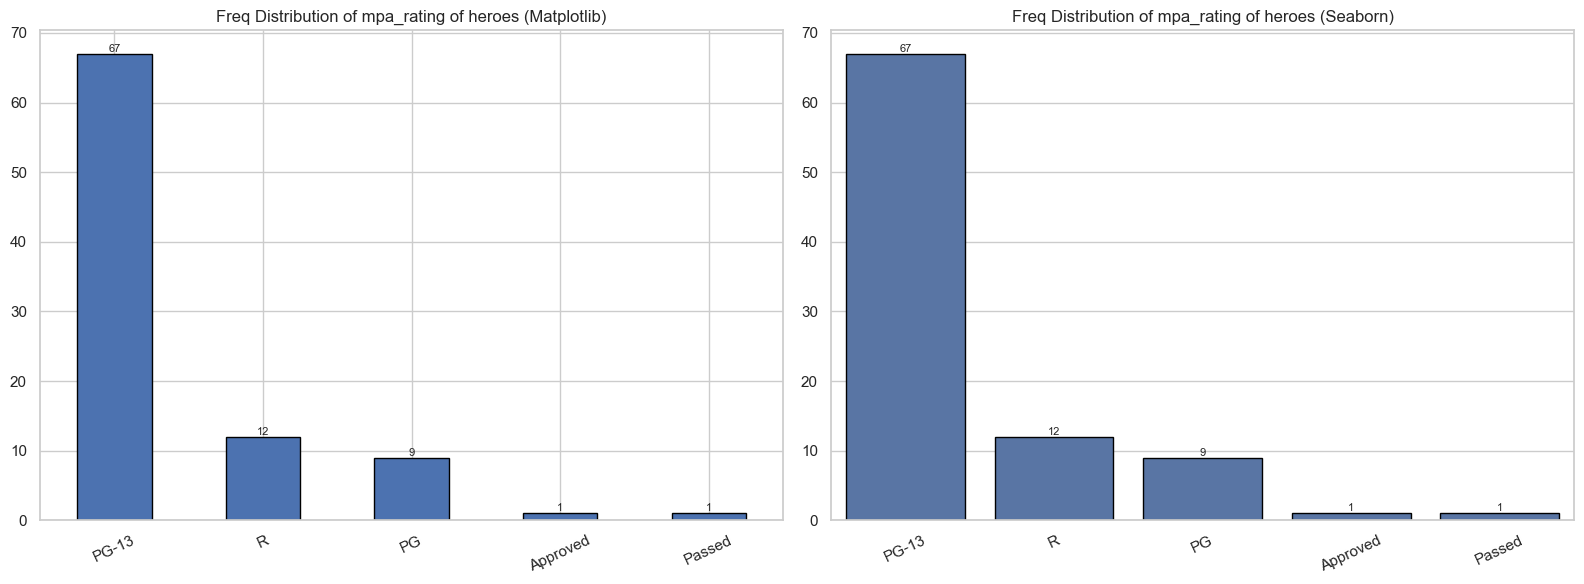

In [122]:
eda_movies.bar_chart('mpa_rating')

##### - imdb_rating:   
Description:&nbsp; IMDb rating of the movie  
This is a numerical variable, use describe() to see the value distribution. As shown, the ratings range from a minimum of 2.9 to a maximum of 9.0.

In [123]:
df_movie_raw['imdb_rating'].describe()

count    90.000000
mean      6.552222
std       1.271576
min       2.900000
25%       5.700000
50%       6.900000
75%       7.400000
max       9.000000
Name: imdb_rating, dtype: float64

Plot these results and visuallize the data with histogram through Matplotlib and Seaborn.

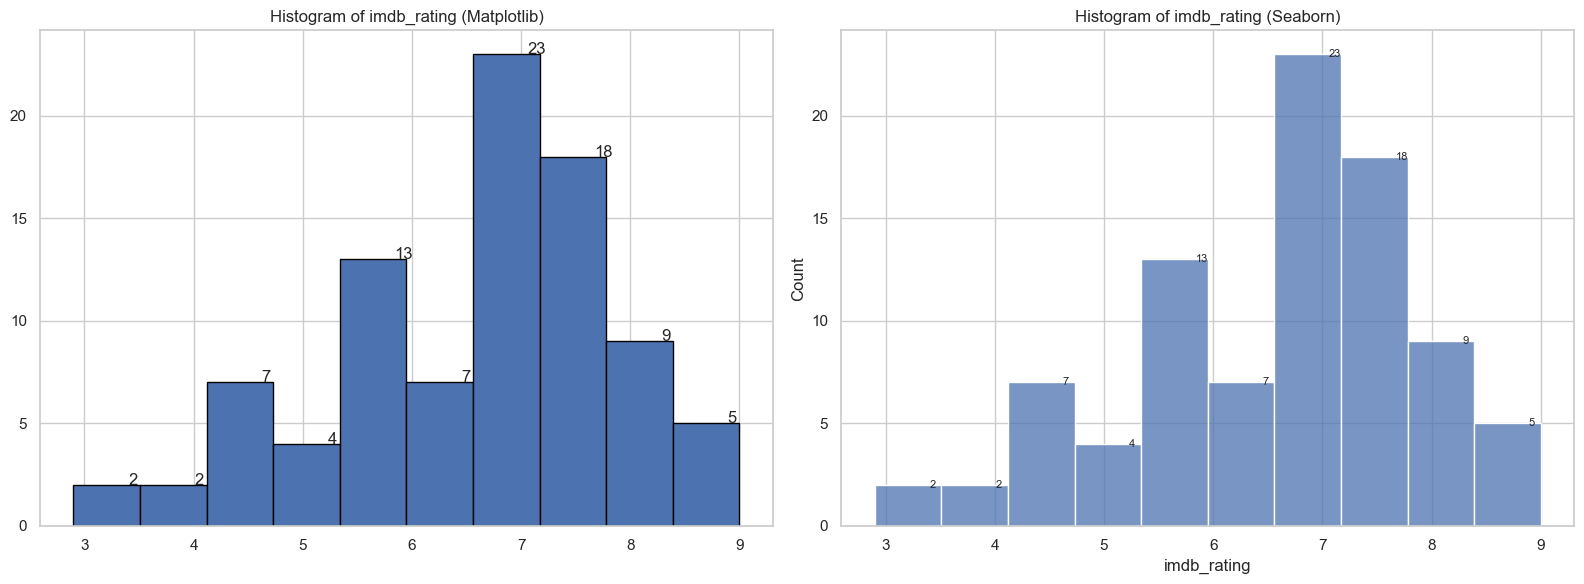

In [124]:
eda_movies.hist_chart('imdb_rating')

##### - imdb_votes:   
Description:&nbsp; Number of votes the movie received on IMDb  
This is a numerical variable, use describe() to see the value distribution. As shown, the vote has a mean of approximately 465,283. The votes vary widely, with the smallest at 844 and the largest reaching 2.37 million. 

In [125]:
df_movie_raw['imdb_votes'].describe()

count    9.000000e+01
mean     4.652830e+05
std      3.834906e+05
min      8.440000e+02
25%      1.910570e+05
50%      4.212640e+05
75%      6.548668e+05
max      2.369304e+06
Name: imdb_votes, dtype: float64

##### - imdb_gross:   
Description:&nbsp; Gross earnings of the movie according to IMDb  
This is a numerical variable, use describe() to see the value distribution. As shown, mean gross revenue is around $212,368,200 and standard deviation is approximately $173,757,600. The minimum value is $0, indicating there might be missing or unrecorded data points, while the maximum gross is approximately $858,370,000. 

In [126]:
df_movie_raw['imdb_gross'].describe()

count    9.000000e+01
mean     2.123682e+08
std      1.737576e+08
min      0.000000e+00
25%      7.757250e+07
50%      1.806150e+08
75%      3.249725e+08
max      8.583700e+08
Name: imdb_gross, dtype: float64

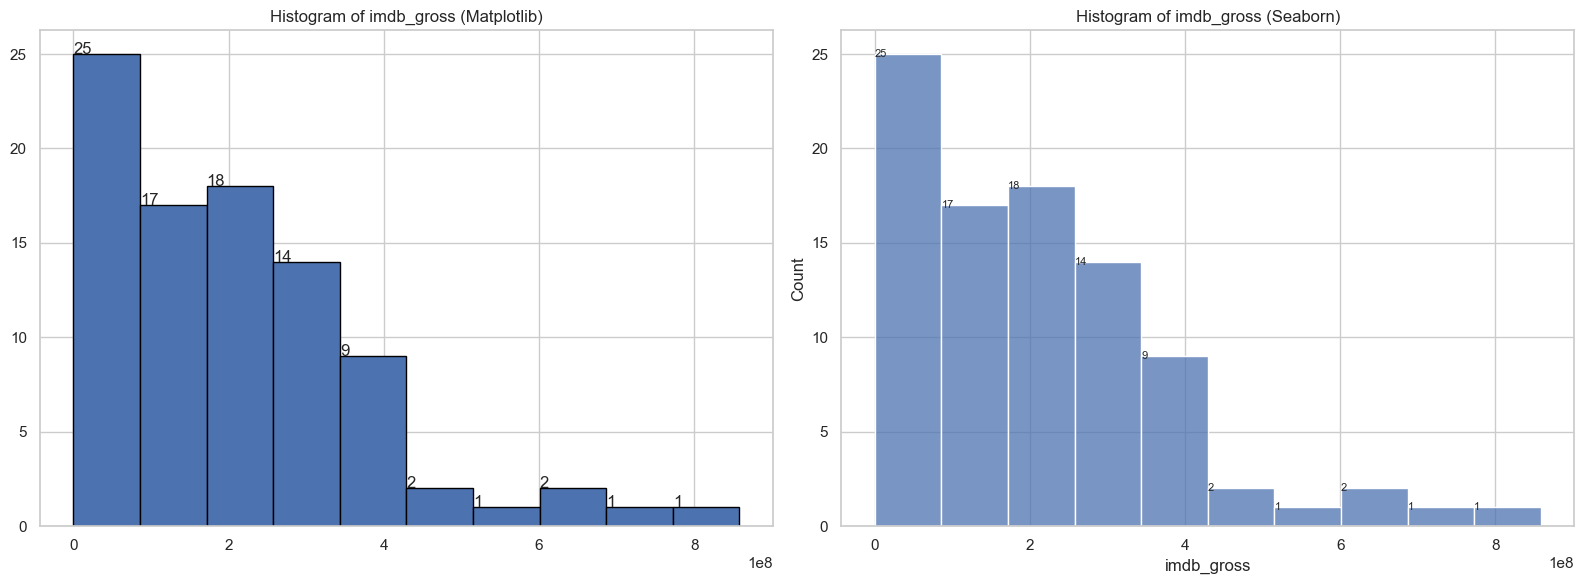

In [127]:
eda_movies.hist_chart('imdb_gross')

##### - director:   
Description:&nbsp; Director(s) of the movie  
The Director of movies is not relevant for this analysis thus this column can be dropped.

##### - stars:   
Description:&nbsp; Main actors or stars in the movie  
The stars of movies is not relevant for this analysis thus this column can be dropped.

##### - description:   
Description:&nbsp; Brief description or summary of the movie  
The description of movies is not relevant for this analysis thus this column can be dropped.

##### - crit_consensus:   
Description:&nbsp;  Critical consensus or summary of critical reviews about the movie.  
The crit_consensus of movies is not relevant for this analysis thus this column can be dropped.

##### - tomato_meter:   
Description:&nbsp; Rotten Tomatoes meter score.  
This is a numerical variable, use describe() to see the value distribution.

In [128]:
df_movie_raw['tomato_meter'].describe()

count    90.000000
mean     59.900000
std      29.439731
min       0.000000
25%      31.250000
50%      67.500000
75%      85.750000
max      96.000000
Name: tomato_meter, dtype: float64

##### - tom_aud_score:   
Description:&nbsp; Rotten Tomatoes audience score.  
This is a numerical variable, use describe() to see the value distribution.

In [129]:
df_movie_raw['tom_aud_score'].describe()

count    90.000000
mean     66.733333
std      22.646179
min      15.000000
25%      55.250000
50%      73.500000
75%      85.000000
max      95.000000
Name: tom_aud_score, dtype: float64

##### - tomato_review:   
Description:&nbsp; Number of reviews on Rotten Tomatoes  
The tomato_review of movies is not relevant for this analysis thus this column can be dropped.

##### - tom_ratings:   
Description:&nbsp; Total number of ratings on Rotten Tomatoes  
The tom_ratings of movies is not relevant for this analysis thus this column can be dropped.

##### - entity:   
Description:&nbsp; Whether it is a Marvel movie or DC movie.  
This is a categorical variable, use value_counts() to see the value under each category. As shown, there are 5 category for the identity status.  

In [130]:
df_movie_raw['entity'].value_counts()

entity
MARVEL    57
DC        33
Name: count, dtype: int64

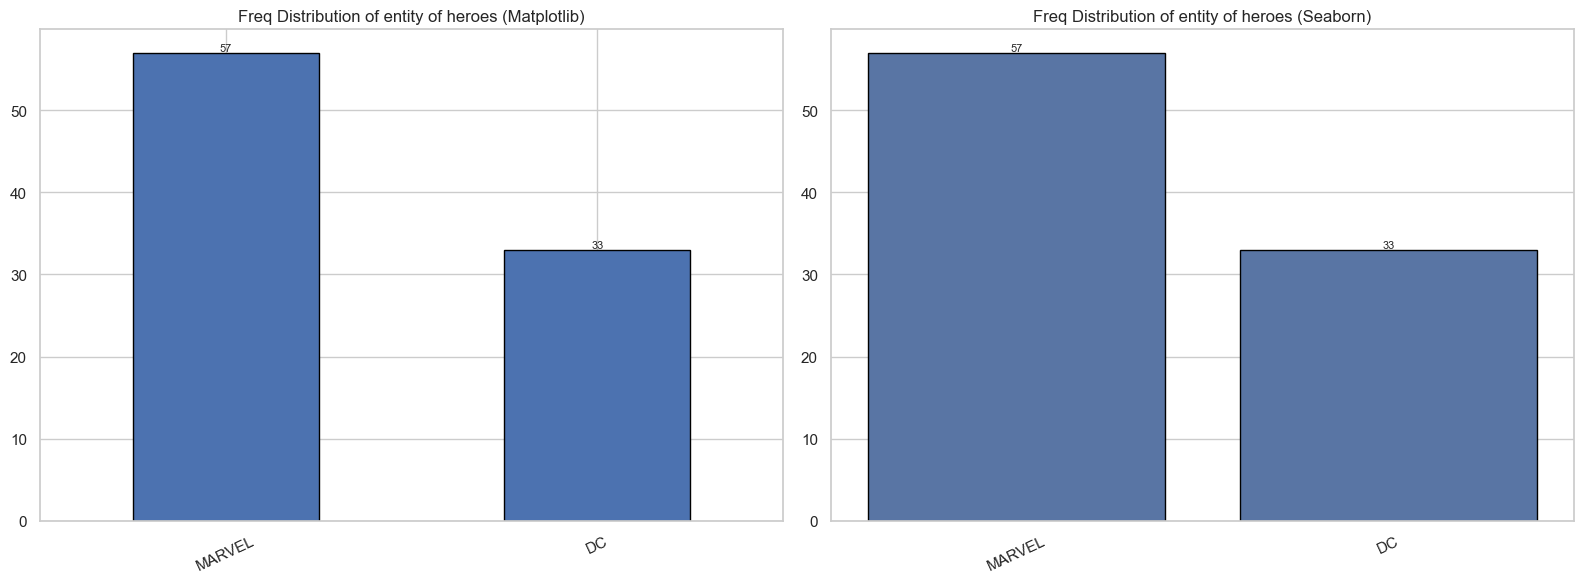

In [131]:
eda_movies.bar_chart('entity')

##### - id:   
Description:&nbsp; Unique identifier or ID for the movie.  
The id of movies is not relevant for this analysis.

##### 3.1.2 Bivariate Analysis
In this part, the analysis will go through some columns in the dataset to get a basic understanding.


In [132]:
from src.hero_data.EDA.multi_coumun import EDA_multi_column

eda_movies_m = EDA_multi_column(df_movie_raw)

##### -imdb_rating & imdb_gross
The scatter plot shows a weak positive correlation between imdb_rating and imdb_gross. This means that movies with higher imdb ratings tend to have higher imdb gross. However there are many movies with high imdb ratings that have low imdb gross, and vice versa. This indicates that there are other factors that influence imdb gross besides imdb rating, such as genre, marketing budget, and release date.

It can be explained by that imdb rating is a rough indicator of movie quality but not as a perfect measurement. 

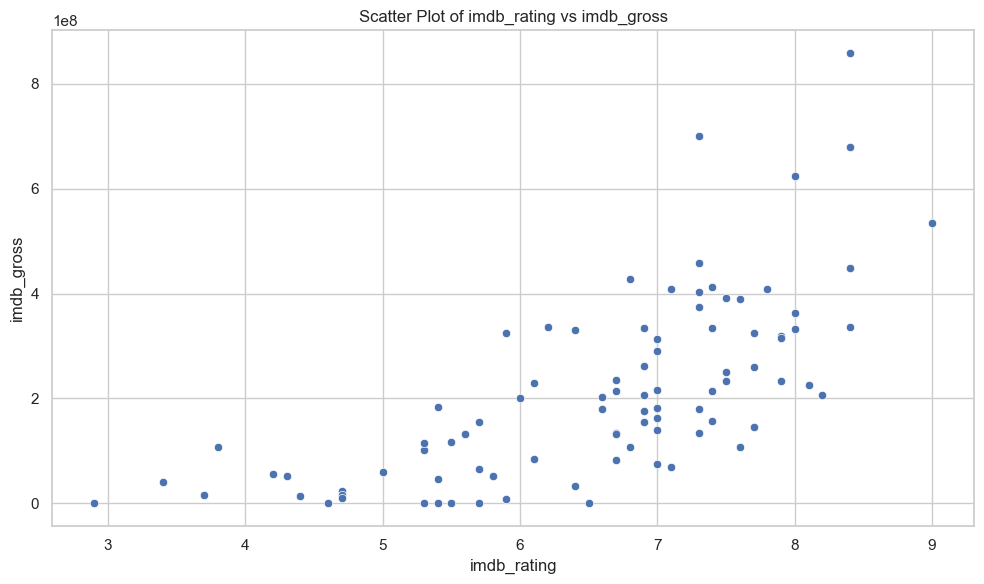

In [133]:
eda_movies_m.scatter_plot(['imdb_rating','imdb_gross'])

### 3.3 Data Cleaning

##### 3.3.1 Column drop
Drop the column not needed an both dataset.

In [134]:
from src.hero_data.EDA.data_cleaning import Clean

cleaner_comic= Clean(df_comic_raw)

columns_to_exclude = ['page_id', 'urlslug','EYE','HAIR','FIRST APPEARANCE']
df_comic_c = cleaner_comic.delete_columns(columns_to_exclude)
display(df_comic_c.columns)

cleaner_movie= Clean(df_movie_raw)

columns_to_exclude = ['Unnamed: 0','mpa_rating', 'imdb_votes','director','stars','description','crit_consensus','tomato_review','tom_ratings']
df_movie_c = cleaner_movie.delete_columns(columns_to_exclude)
display(df_movie_c.columns)

Index(['name', 'ID', 'ALIGN', 'SEX', 'GSM', 'ALIVE', 'APPEARANCES', 'YEAR',
       'Comic'],
      dtype='object')

Index(['title', 'year', 'genre', 'runtime', 'imdb_rating', 'imdb_gross',
       'tomato_meter', 'tom_aud_score', 'entity', 'id'],
      dtype='object')

##### 3.3.2 NULL Clean
Through 3.1 and 3.2, we can see there is a significant number of NULL data. The null_check below shows the null value in each column. The lighter color indicates a null value.

GSM            23118
ID              5783
ALIGN           3413
APPEARANCES     1451
SEX              979
YEAR             884
ALIVE              6
name               0
Comic              0
dtype: int64

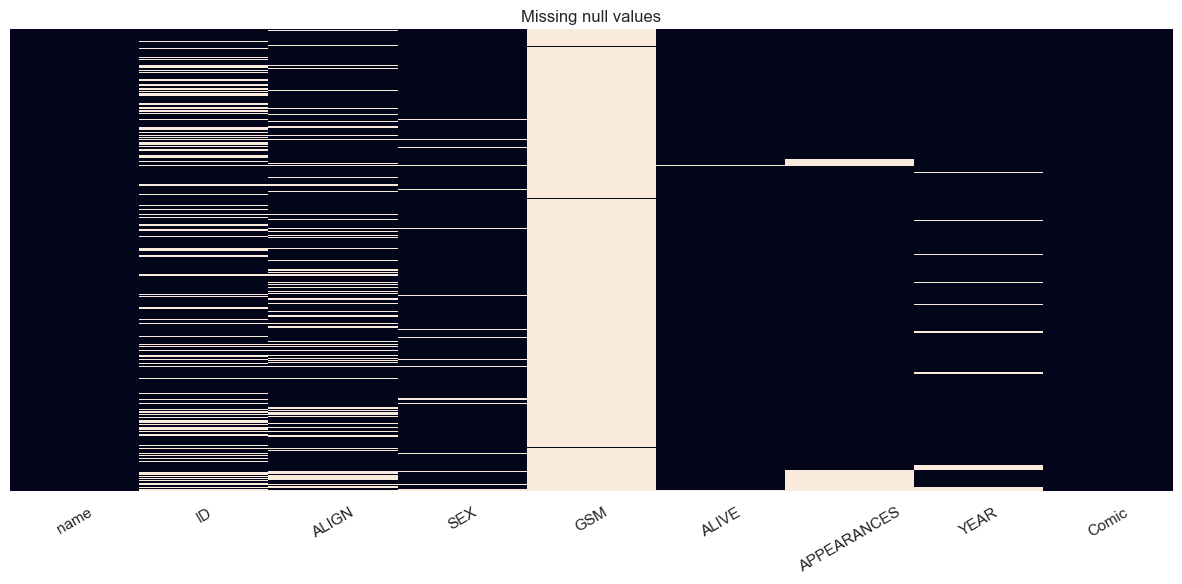

In [135]:
cleaner_comic.null_check()

| Variable          | Description                                                       |
|-------------------|-------------------------------------------------------------------------------|
| ID                | Some heros' identity is not clear in comics, so replace the NaN values with "Unknown". Combine null value with original category "Identity Unknown"|
| ALIGN             | Replace the NaN value with 'Unknown'.                                                    |
| SEX               | NaN value in SEX can be replaced by 'Unknown'.                                            |
| GSM               | Column GSM is for very little number of heros, the null value stands for no GSM. So null value is reasonable. Replace null with 'not GSM'   |
| APPEARANCES       | Column appearances has null subject for heros that never appear in comics, but do have basic information. So replace the null value with 0.                                    |
| YEAR              | The year of the character's first appearance in a comic book                                 |

name           0
ID             0
ALIGN          0
SEX            0
GSM            0
ALIVE          0
APPEARANCES    0
YEAR           0
Comic          0
dtype: int64

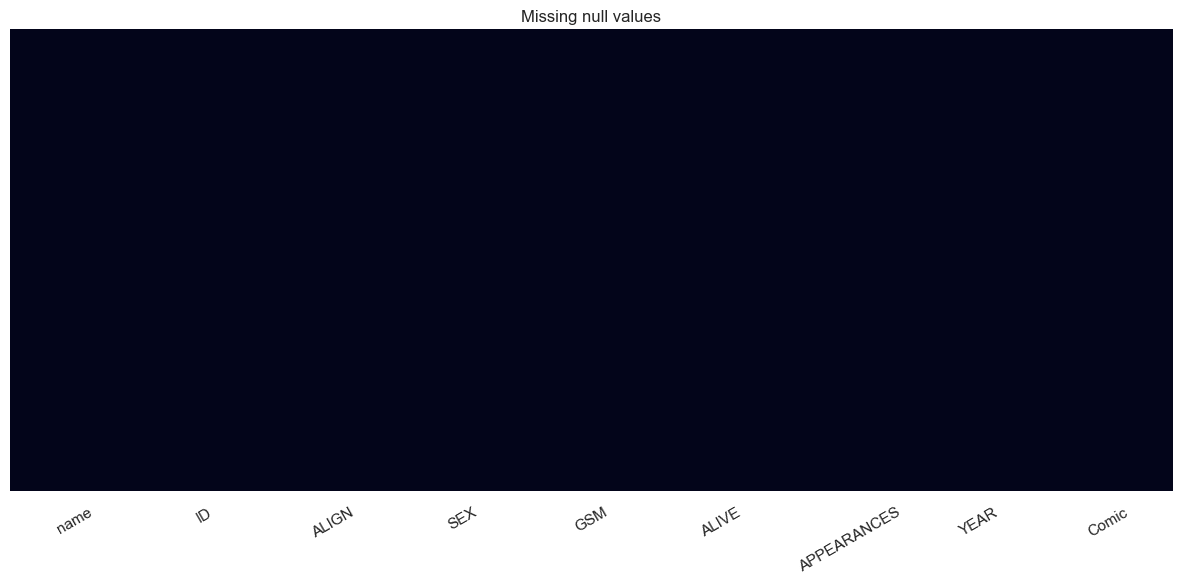

In [136]:
df_comic=cleaner_comic.replace_null()
cleaner_comic.null_check()

The second dataset has no null value.

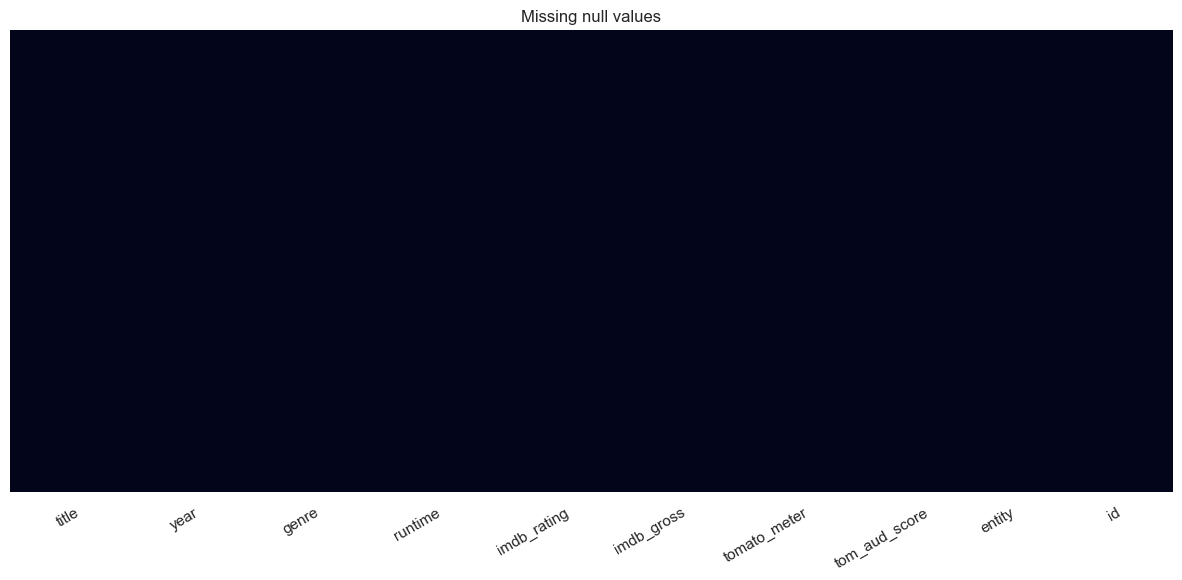

In [137]:
cleaner_movie.null_check()
df_movie=df_movie_c

# 4 Inference

For the inference section, we'll select data related to research question and perform a analysis.

In [138]:
from src.hero_data.Inference.Infer import Analysis

### 4.1 Dataset 1: comic book superheroes


In [139]:
analyzer_comic = Analysis(df_comic)

##### 4.1.1 Does Gender have a impact on the alignment of the heroes?

The chart below represent the percentage of alignment of heroes within different sex. In total, it is clear that bad characters are little bit more than Good characters.  
For transgender characters, all of the characters are bad; Compared with female characters, male has a larger percentage of bad characters; for genderfuid characters, there are no bad characters. 

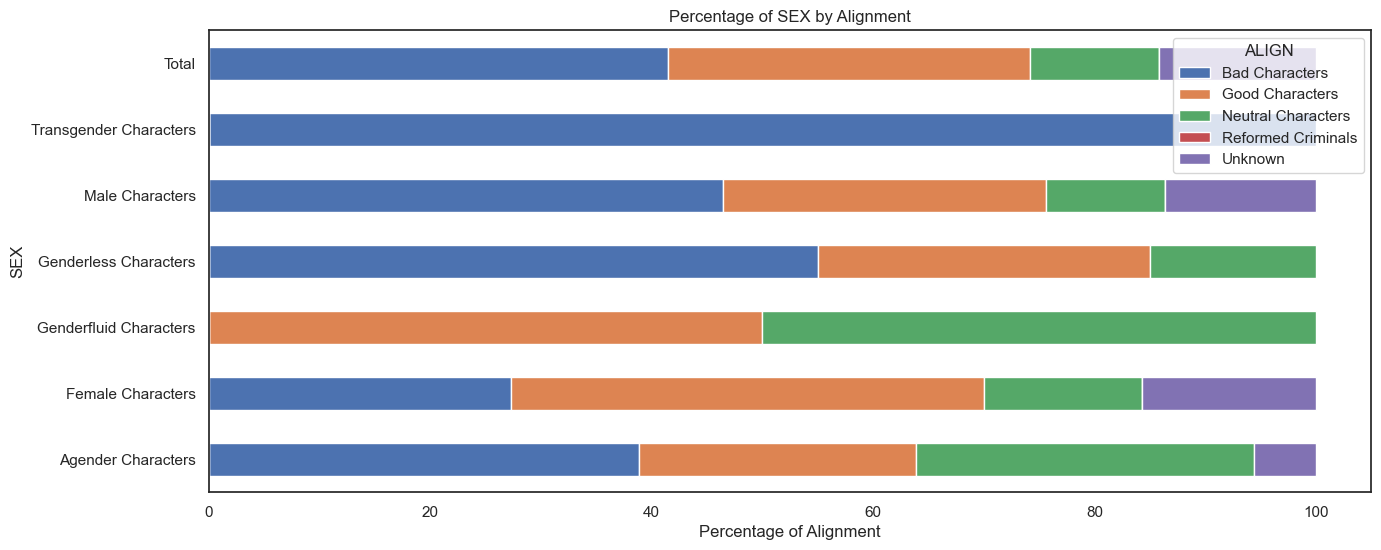

In [140]:
analyzer_comic.Align_Sex()

##### 4.1.2 Does Marvel have more attention on the gender and sexual minority than DC?

From the chart below it is obvious that DC has less heroes that is gender and sexual minority than Marvel. For other four types of GSM, DC have no heroes of it.

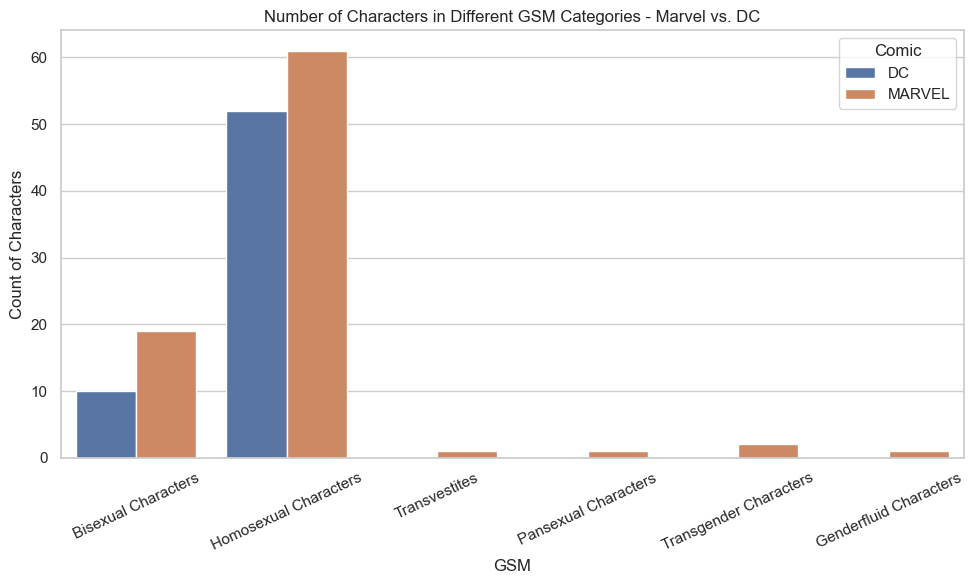

In [141]:
analyzer_comic.GSM_Comic()

### 4.2 Dataset 2: movie superheroes

In [142]:


analyzer_movie = Analysis(df_movie)

##### 4.2.1 What genre of the superhero movie has a better rating?
In this question, we will give a insight about the genre of the superhero movies. The genre of the movie can be a preference of audience, however it may have strong relation with the movie ratings. So providing the average ratings of each genre can help us better understand what genre does the audience like, and what genre can be most suitable for superhero movies.  

The genre column contains multiple genres in each row. So we have to split the genres into individual rows, and group the genres. And calculate the ratings on each genre as well as the number of movies on this genre.

In the chart are the average ratings on superhero movies from 1944 to 2020, grouping by genres.   
Count: The Action genre are in the most movies. Followed by Adventure and Sci-Fi. The other genres has relatively less movies.  
The ratings are selected from 3 different indicaters: IMDb, Rotten Tomato meter and its audience rating.  
For the overall rating, all genres have very close average rating, but the Comedy is having the best rating. Followed by drama and Sci-Fi. Crime genre has the lowest rating of all, with only 52/100 on the average rating.

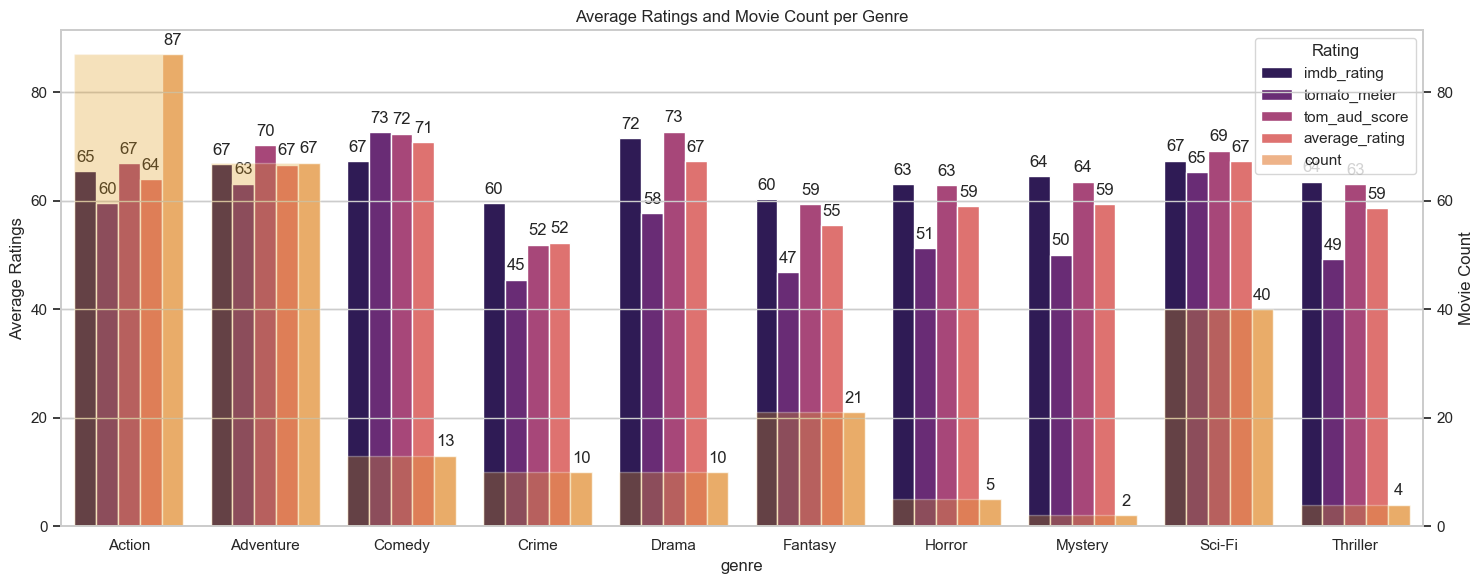

In [143]:
analyzer_movie.genre_analysis()

# 5.Conclusion:   
1. From the chart, it's evident that gender has some influence on the alignment of heroes. Transgender characters are exclusively categorized as "Bad," which might suggest a specific portrayal or narrative in storytelling. Male characters demonstrate a larger percentage in the "Bad" category compared to female characters, indicating a potential bias or tendency toward portraying male characters in morally ambiguous or antagonistic roles. Notably, genderfluid characters predominantly fall under "Neutral" or "Good" alignments, suggesting a more varied or less stereotypical portrayal. Overall, while there seems to be some impact, additional analysis and exploration are crucial to better understand the relationship between gender and hero alignment.

2. Based on the observation from the chart, it's apparent that Marvel portrays a larger number of heroes falling within gender and sexual minority categories compared to DC. Specifically, Marvel encompasses a more diverse representation across various gender and sexual minority types in their hero roster compared to DC. The absence of heroes falling under other GSM types within DC indicates a potential disparity in the representation of these minorities between the two comic publishers. As a conclusion, Marvel appears to have a comparatively more pronounced focus on gender and sexual minority representation in their superhero lineup compared to DC.


3. Comedy tends to have the highest average ratings among superhero movie genres. This could be attributed to its wider appeal and relatability to diverse audiences. Conversely, Crime genres often portray darker themes and complex narratives, potentially limiting their audience reach and impacting their overall ratings, leading to lower average scores.

# Reference:
dataset 1: https://github.com/fivethirtyeight/data/blob/master/comic-characters/README.md
dataset 2: https://drive.google.com/file/d/1wJvsXEctDJScS6dv9IvJy65Qr5LwQL8P/view